In [1]:
import numpy as np 
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import re

In [2]:
filename= glob.glob('/Users/reza/Desktop/NRC_project/data/combustion_instability_timeseriesData/HydrogenData/*.xlsx')


In [3]:
len(filename)

96

# 1. Data preprocessing

In [4]:
names=['Frequency','RMS DP3 pressure','RMS PMT']
y_data=pd.read_excel('/Users/reza/Desktop/NRC_project/data/combustion_instability_timeseriesData/HydrogenData/open_30kW_600slpm_60_.xlsx',header=None,names=names)
Y_data=y_data.drop('Frequency', axis=1)
#Y_data.drop([0],axis=0, inplace=True)
#Y_data

In [5]:
names=['Frequency','RMS DP3 pressure','RMS PMT']
#for i in range (len(filename)-2):
for i in range (len(filename)):
    y_data=pd.read_excel(filename[i],header=None,names=names)
    Y_data=y_data.drop('Frequency', axis=1)
    
    #80% of data
    #Y_data=Y_data.loc[:int(0.1*len(Y_data)-1)]
    
    
    
    splittedDirectorty=filename[i].split("/")
    splittedDirectorty[-1]
    splittedFilename=splittedDirectorty[-1].split('_')
    one_data=[]

    if splittedFilename[0]=='open':
        one_data.extend([1])
    if splittedFilename[0]=='closed' or splittedFilename[0]=='closed2' :
            one_data.extend([0])
    sep= re.compile("([0-9]+)([a-zA-Z]+)") 

    heat=sep.match(splittedFilename[1])
    one_data.append(int(heat.group(1)))
    air=sep.match(splittedFilename[2])
    one_data.append(int(air.group(1)))
    one_data.append(int(splittedFilename[3]))
    #print(one_data)
    oneRowData=[one_data]
    x_data= pd.DataFrame(oneRowData,columns=['open/closed','Heat','H2','Airflow'])
    X_data=pd.DataFrame(np.repeat(x_data.values,len(Y_data),axis=0),columns=x_data.columns)
#time=[i/2 for i in range(0, len(Y_data))]
#X_data.insert(0,'time',time)
    xx_data=pd.concat([X_data,Y_data],axis=1)
    
    xx_data.drop([len(Y_data)-1],axis=0,inplace=True)
    
    yy_data=Y_data.drop([0],axis=0,inplace=False)
    
    if i==0:
        total_x_data=xx_data
        total_y_data=yy_data
    if i!=0:
        total_x_data=pd.concat([total_x_data,xx_data],axis=0)
        total_y_data=pd.concat([total_y_data,yy_data])

In [6]:
print(total_x_data.shape)
print(total_y_data.shape)

(11519904, 6)
(11519904, 2)


In [7]:
for i in range (len(filename)-2,len(filename)):
    y_test_data=pd.read_excel(filename[i],header=None,names=names)
    Y_test_data=y_test_data.drop('Frequency', axis=1)
    splittedDirectorty=filename[i].split("/")
    splittedDirectorty[-1]
    splittedFilename=splittedDirectorty[-1].split('_')
    one_data=[]

    if splittedFilename[0]=='open':
        one_data.extend([1])
    if splittedFilename[0]=='closed' or splittedFilename[0]=='closed2' :
            one_data.extend([0])
    sep= re.compile("([0-9]+)([a-zA-Z]+)") 

    heat=sep.match(splittedFilename[1])
    one_data.append(int(heat.group(1)))
    air=sep.match(splittedFilename[2])
    one_data.append(int(air.group(1)))
    one_data.append(int(splittedFilename[3]))
    print(one_data)
    oneRowData=[one_data]
    x_test_data= pd.DataFrame(oneRowData,columns=['open/closed','Heat','H2','Airflow'])
    X_test_data=pd.DataFrame(np.repeat(x_test_data.values,len(Y_test_data),axis=0),columns=x_test_data.columns)
#time=[i/2 for i in range(0, len(Y_data))]
#X_data.insert(0,'time',time)
    xx_test_data=pd.concat([X_test_data,Y_test_data],axis=1)
    xx_test_data.drop([119999],axis=0,inplace=True)
    
    yy_test_data=Y_test_data.drop([0],axis=0,inplace=False)
    
    if i==94:
        total_x_test_data=xx_test_data
        total_y_test_data=yy_test_data
    if i!=94:
        total_x_test_data=pd.concat([total_x_test_data,xx_test_data],axis=0)
        total_y_test_data=pd.concat([total_y_test_data,yy_test_data])

[0, 25, 500, 0]
[1, 20, 400, 40]


In [8]:
print(total_x_test_data.shape)
print(total_y_test_data.shape)

(239998, 6)
(239998, 2)


In [9]:
#creating new test dataset for transient hydrogen (one experiment)
test_transient_data=pd.read_excel('/Users/reza/Desktop/NRC_project/data/combustion_instability_timeseriesData/new_new_HydrogenData/open_25kW_600slpm_80%to70%.xlsx')
x_test_trans=test_transient_data.iloc[:-1,1:7]
x_test_trans.iloc[:,2]=25
x_test_trans.iloc[:,0]=1
y_test_trans=test_transient_data.iloc[1:,5:7]
print(x_test_trans.shape)
print(y_test_trans.shape)

(239999, 6)
(239999, 2)


In [10]:
x_test_trans

,Acoustic condition,Air flow rate [slpm],Heat input,H2%,Pressure [psi],PMT
0,1,600,25,79.926063,-0.002814,-0.061840
1,1,600,25,79.925986,-0.001699,-0.061329
2,1,600,25,79.925909,0.001568,-0.061502
3,1,600,25,79.925832,0.002147,-0.061871
4,1,600,25,79.925756,0.000867,-0.060242
...,...,...,...,...,...,...
239994,1,600,25,69.736834,-0.001791,-0.106635
239995,1,600,25,69.736802,-0.001632,-0.105248
239996,1,600,25,69.736770,-0.000614,-0.105471
239997,1,600,25,69.736738,0.001306,-0.109052


In [11]:
normalizer=layers.Normalization(axis=-1)
normalizer.adapt(np.array(total_x_data))
#normalizer.adapt(np.array(total_x_test_data))
#normalizer.adapt(np.array(x_test_trans))

Metal device set to: Apple M1 Pro


2023-01-06 14:35:55.522932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-06 14:35:55.523566: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-06 14:35:55.898942: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-06 14:35:56.005503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-06 14:35:56.021513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


# xx_data and y_data are data and label

In [12]:
#normalizer=layers.Normalization(axis=-1)
#normalizer.adapt(np.array(X_data))

In [12]:
def get_model():
    model=keras.Sequential([normalizer,layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(1)
                         ])
    
    return model

In [13]:
model_Pressure=get_model()
model_PMT=get_model()
#model_frequency=get_model()

inputs=keras.Input(shape=(6,))

pressure=model_Pressure(inputs)
#Frequency=model_frequency(inputs)
PMT=model_PMT(inputs)

In [14]:
final_model=keras.Model(inputs=inputs,outputs=[pressure,PMT])

final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, 1)            1454        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 1)            1454        ['input_1[0][0]']                
                                                                                                  
Total params: 2,895
Trainable params: 2,882
Non-trainable params: 13
__________________________________________________________________________________________________


In [15]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9)

In [16]:
final_model.compile(loss= [tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError()],
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=3e-04),
                   metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history=final_model.fit(total_x_data,[total_y_data.iloc[:,0],total_y_data.iloc[:,1]],
                        batch_size=500,validation_split=0.2,
                    verbose=2,epochs=15)

Epoch 1/15


2023-01-06 16:12:33.707201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2023-01-06 16:16:00.801261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18432/18432 - 235s - loss: 0.0383 - sequential_loss: 0.0039 - sequential_1_loss: 0.0094 - sequential_root_mean_squared_error: 0.0190 - sequential_1_root_mean_squared_error: 0.0423 - val_loss: 0.0191 - val_sequential_loss: 0.0027 - val_sequential_1_loss: 0.0103 - val_sequential_root_mean_squared_error: 0.0038 - val_sequential_1_root_mean_squared_error: 0.0623 - 235s/epoch - 13ms/step
Epoch 2/15
18432/18432 - 242s - loss: 0.0102 - sequential_loss: 0.0024 - sequential_1_loss: 0.0043 - sequential_root_mean_squared_error: 0.0033 - sequential_1_root_mean_squared_error: 0.0128 - val_loss: 0.0112 - val_sequential_loss: 0.0023 - val_sequential_1_loss: 0.0068 - val_sequential_root_mean_squared_error: 0.0034 - val_sequential_1_root_mean_squared_error: 0.0303 - 242s/epoch - 13ms/step
Epoch 3/15
18432/18432 - 245s - loss: 0.0076 - sequential_loss: 0.0023 - sequential_1_loss: 0.0037 - sequential_root_mean_squared_error: 0.0032 - sequential_1_root_mean_squared_error: 0.0106 - val_loss: 0.0103 - val_s

In [23]:
result=final_model.evaluate(total_x_data,[total_y_data.iloc[:,0],total_y_data.iloc[:,1]],verbose=2)

KeyboardInterrupt: 

In [19]:
#outputs=final_model.predict(total_x_data.iloc[11110000:11111000])
outputs_test=final_model.predict(total_x_test_data.iloc[210000:211000])

2023-01-05 15:49:08.132849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [21]:
normalizer.adapt(np.array(total_x_test_data))

2023-01-05 16:54:55.838624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [15]:
#for transient testing
#outputs=final_model.predict(total_x_data.iloc[11110000:11111000])
#outputs_test=final_model.predict(total_x_test_data.iloc[230000:231000])
output_transient_test=final_model.predict(x_test_trans.iloc[210000:211000])

2023-01-05 17:16:56.728903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [19]:
#output_transient_test[0]

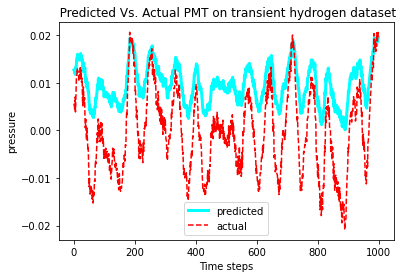

In [16]:
#ploting transient. data for test (one experiment)
num=[i for i in range(1000)]
plt.plot(num, output_transient_test[0][0:1000], linewidth=3.0, label='predicted',color='cyan')
plt.plot(num,y_test_trans.iloc[210000:211000,0],linestyle='--',label='actual', color='red')



plt.ylabel('pressure')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('  Predicted Vs. Actual PMT on transient hydrogen dataset ')
#plt.title('  Predicted Vs. Actual RMS DP3 pressure on transient hydrogen dataset ')

plt.legend()
plt.show()

In [63]:
#providing results one by one (in a for loop)
output_for_transient_PMT=[]
output_for_transient_DP3=[]
output_transient_test=final_model.predict(x_test_trans.iloc[210000:210001])
new_testdata_forloop=x_test_trans
for i in range(1000):
    #print(i)
    output_for_transient_PMT.append(float(output_transient_test[0]))
    output_for_transient_DP3.append(float(output_transient_test[1]))
    new_testdata_forloop.iloc[210000+i+1,4]= output_transient_test[0][0]
    new_testdata_forloop.iloc[210000+i+1,5]= output_transient_test[1][0]
    output_transient_test=final_model.predict(new_testdata_forloop.iloc[210000+i+1:210001+i+1])

In [64]:
len(output_for_transient_PMT)

1000

In [19]:
output_for_transient_PMT.append(output_transient_test[0])
output_for_transient_DP3.append(output_transient_test[1])

In [22]:
new_testdata_forloop.iloc[210001]

Acoustic condition        1.000000
Air flow rate [slpm]    600.000000
Heat input               25.000000
H2%                      69.901572
Pressure [psi]            0.005627
PMT                       0.073920
Name: 210001, dtype: float64

In [43]:
new_testdata_forloop.iloc[210001,4]= output_transient_test[0][0]

In [44]:
new_testdata_forloop.iloc[210001]

Acoustic condition        1.000000
Air flow rate [slpm]    600.000000
Heat input               25.000000
H2%                      69.901572
Pressure [psi]            0.012702
PMT                       0.073920
Name: 210001, dtype: float64

In [71]:
new=x_test_trans.iloc[210000:210001]
new

,Acoustic condition,Air flow rate [slpm],Heat input,H2%,Pressure [psi],PMT
210000,1,600,25,69.901567,0.005895,0.076554


In [66]:
output_for_transient_PMT[200]

0.017701782286167145

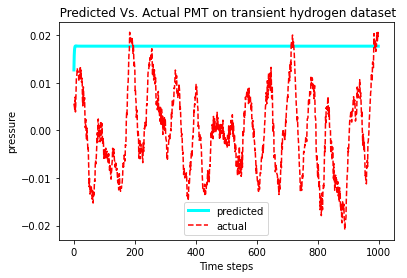

In [69]:
# for loop results
#ploting transient. data for test (one experiment)
num=[i for i in range(1000)]
plt.plot(num, output_for_transient_PMT[0:1000], linewidth=3.0, label='predicted',color='cyan')
plt.plot(num,y_test_trans.iloc[210000:211000,0],linestyle='--',label='actual', color='red')



plt.ylabel('pressure')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('  Predicted Vs. Actual PMT on transient hydrogen dataset ')
#plt.title('  Predicted Vs. Actual RMS DP3 pressure on transient hydrogen dataset ')

plt.legend()
plt.show()

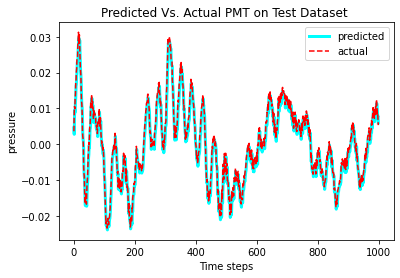

In [22]:
num=[i for i in range(1000)]
#num_j=[j+10 for j in range(1000)]
plt.plot(num, outputs_test[0][0:1000], linewidth=3.0, label='predicted',color='cyan')
plt.plot(num,total_y_test_data.iloc[210000:211000,0],linestyle='--',label='actual', color='red')



plt.ylabel('pressure')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('Predicted Vs. Actual PMT on Test Dataset ')
#plt.title('Predicted Vs. Actual RMS DP3 pressure On Test Dataset')

plt.legend()
plt.show()

In [24]:
num=[i for i in range(1000)]
plt.plot(num, outputs[0][0:1000], linewidth=4.0, label='predicted',color='cyan')
plt.plot(num,total_y_data.iloc[11110000:11111000,0],linestyle='--',label='actual', color='red')



plt.ylabel('pressure')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('Predicted Vs. Actual RMS DP3 pressure')
plt.legend()
plt.show()

NameError: name 'outputs' is not defined

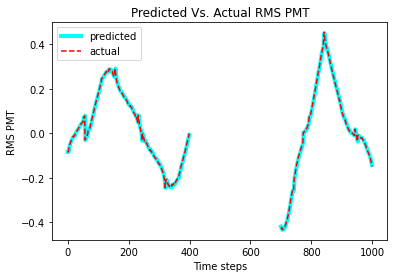

In [20]:
num=[i for i in range(400)]
plt.plot(num, outputs[1][0:400], linewidth=4.0, label='predicted',color='cyan')
plt.plot(num,total_y_data.iloc[11110000:11110400,1],linestyle='--',label='actual', color='red')

num2=[i for i in range(700,1000)]
plt.plot(num2, outputs[1][700:1000], linewidth=4.0,color='cyan')
plt.plot(num2,total_y_data.iloc[11110700:11111000,1],linestyle='--', color='red')

plt.ylabel('RMS PMT')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('Predicted Vs. Actual RMS PMT')
plt.legend()
plt.show()

In [56]:
Y_data.iloc[0:1000,1]

0     -0.003022
1     -0.013054
2     -0.017345
3     -0.006685
4     -0.000895
         ...   
995    0.014678
996    0.011350
997    0.008113
998    0.009753
999    0.016244
Name: Frequency, Length: 1000, dtype: float64

In [57]:
outputs[1][0:1000]

array([[0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343915],
       [0.00343915],
       [0.00343915],
       [0.003

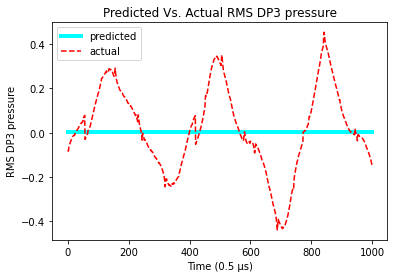

In [69]:
num=[i for i in range(1000)]
plt.plot(num, outputs[1][0:1000], linewidth=4.0, label='predicted',color='cyan')
plt.plot(num,total_y_data.iloc[11110000:11111000,1],linestyle='--',label='actual', color='red')



plt.ylabel('RMS DP3 pressure')
#plt.ylim(0,0.3)
plt.xlabel('Time (0.5 \u03BCs)')
plt.title('Predicted Vs. Actual RMS DP3 pressure')
plt.legend()
plt.show()

In [39]:
outputs[0:10,1]

array([0.00077899, 0.00077896, 0.00077893, 0.00077884, 0.00077884,
       0.00077878, 0.00077872, 0.00077866, 0.0007786 , 0.0007786 ],
      dtype=float32)

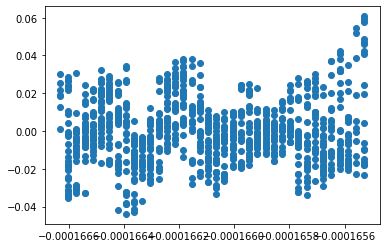

In [57]:
plt.scatter(outputs[100000:101000,1],Y_data.iloc[100000:101000,1])
plt.show()